In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

In [168]:
#helper functions 

def node_coloring(g, c):
    nodes = list(g.nodes())
    for i in range(len(nodes)):
        g.nodes[nodes[i]]['color'] = c[i]
    return g

def edge_coloring(g, c):
    edges = list(g.edges())
    for i in range(len(edges)):
        g.edges[edges[i]]['color'] = c[i]
    return g

def apply_c_map(g, cv_map, ce_map):
    for key1 in list(cv_map.keys()):
        for label1 in cv_map[key1]:
            g.nodes[label1]['color'] = key1 
    
    for key in list(ce_map.keys()):
        for label in ce_map[key]:
            g.edges[label]['color'] = key 
    
    return g 

def get_color(c_map, item):
    #item = node/edge
    for key in list(c_map.keys()):
        if item in c_map[key]:
            return key 
        
def get_c_map(G):
    pass

def view_graph(g):
    c_v = [g.nodes[node]['color'] for node in g.nodes]
    c_e = [g.edges[edge]['color'] for edge in g.edges]
    nx.draw(
    g, 
    with_labels=True, 
    node_color=c_v, 
    edge_color=c_e,
    cmap=plt.cm.Set1, 
    node_size=800,
    width=2,
    font_weight='bold'
    )
    

In [181]:
from collections import defaultdict, Counter

def color_refinement(G):
    nodes = list(G.nodes()) # get nodes
    # print(nodes)
    edges = list(G.edges()) # get edges

    #define color map. init to 0 5
    c_zero = Counter([0])
    cv_map = {frozenset(c_zero.items()): nodes}
    ce_map = {frozenset(c_zero.items()): edges}

    #apply the coloring
    G = apply_c_map(G, cv_map=cv_map, ce_map=ce_map)

    cv_next = defaultdict(list)

    while True:
        for node in nodes:
            curr_color = get_color(cv_map, node)
            new_color = Counter()
            new_color.update(curr_color)
            for neighbor in G.neighbors(node):
                new_color.update(get_color(cv_map, neighbor),)
                try:
                    new_color.update([G.edges[(node,neighbor)]['color'], G.edges[(neighbor,node)]['color']])
                except KeyError:
                    pass
            
            if new_color != curr_color:
                cv_next[frozenset(new_color.items())].append(node)

        cv_map_rep = {i + 1: v for i, (k, v) in enumerate(cv_map.items())}
        cv_next_rep = {i + 1: v for i, (k, v) in enumerate(cv_next.items())}
        ce_map_rep = {i + 1: v for i, (k, v) in enumerate(ce_map.items())}

        if cv_map_rep == cv_next_rep:
            G = apply_c_map(G, cv_map=cv_map_rep, ce_map=ce_map_rep)
            return G 
        else:
            cv_map = cv_next 
            cv_next = defaultdict(list)




    G = apply_c_map(G, cv_map=cv_map_rep, ce_map=ce_map_rep)

    

    return G

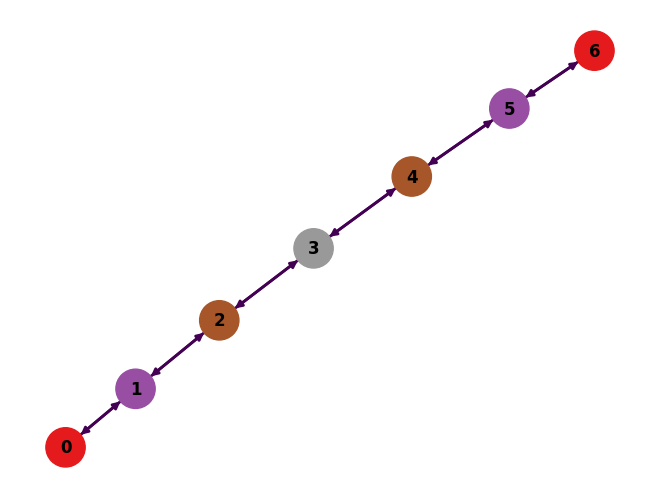

In [187]:
# #Directed graphs 

def make_bidirectional_line(n):
    G = nx.DiGraph()
    for i in range(n - 1):
        G.add_edge(i, i + 1)
        G.add_edge(i + 1, i)
    return G

Dg = make_bidirectional_line(7)

colored_dg = color_refinement(Dg) 
view_graph(colored_dg)


In [183]:
#test cases 

def shrikhande_graph():
    G = nx.Graph()
    # Vertex set: Z_4 × Z_4
    for x in range(4):
        for y in range(4):
            G.add_node((x, y))

    # Define neighbors (mod 4 arithmetic)
    directions = [(0, 1), (1, 0), (1, 1), (1, -1), (2, 0), (0, 2)]
    for x in range(4):
        for y in range(4):
            for dx, dy in directions:
                u = (x, y)
                v = ((x + dx) % 4, (y + dy) % 4)
                if u < v:  # prevent duplicate edges
                    G.add_edge(u, v)
    return G

G1 = shrikhande_graph()
G2 = nx.line_graph(nx.complete_bipartite_graph(4, 4))

refined_g1 = color_refinement(G1)
refined_g2 = color_refinement(G2)

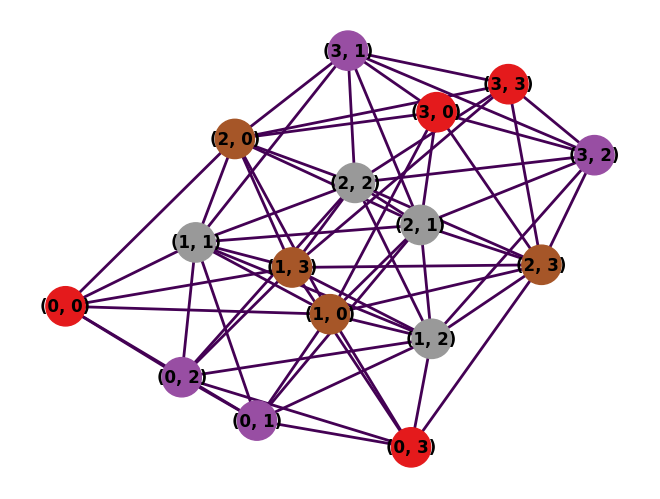

In [184]:
view_graph(refined_g1)

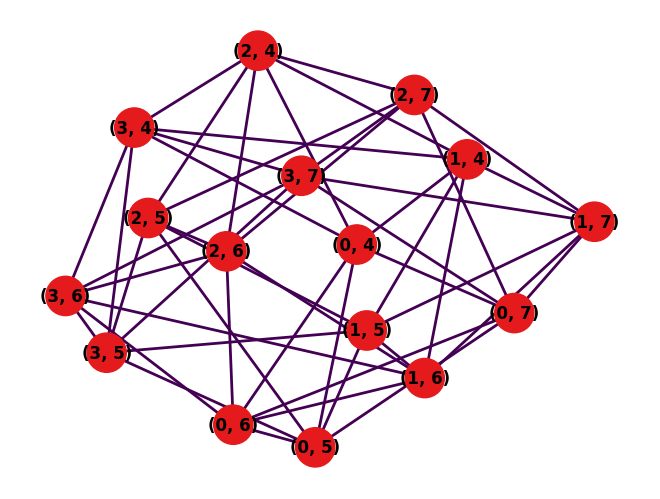

In [185]:
view_graph(refined_g2)

In [61]:

v = {(1,2): [(1,2), (3,4)]}
v[1] = 2
print(v[1])

2


In [59]:
c = {0:[]}
A = []
c[1] = A
A.append(1)
print(c)

{0: [], 1: [1]}


TypeError: 'int' object is not iterable

5


(1, 2, 1)
